In [1]:
import numpy as np

In [2]:
np.random.seed(42)
m = 100 
X = 2 * np.random.rand(m,1) # column vector 
y = 4 + 3 * X + np.random.randn(m,1) # column vector

In [28]:
print(X[:10])

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]]


In [27]:
print(y[:10])

[[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]
 [5.29307969]
 [5.82639572]
 [8.67878666]
 [6.79819647]
 [7.74667842]]


<Figure size 1200x800 with 0 Axes>

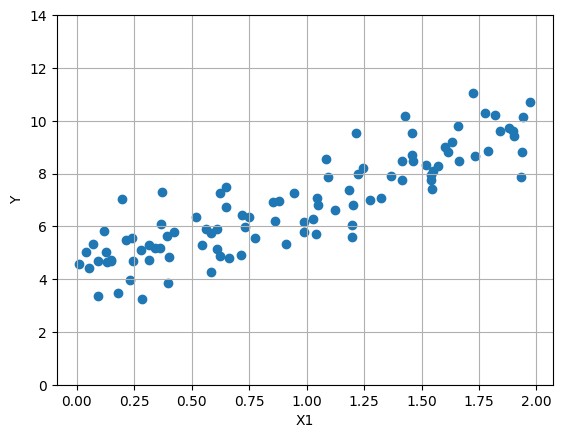

<Figure size 1200x800 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.ylabel('Y')
plt.xlabel('X1')
plt.yticks(np.arange(0,15,2))
plt.grid()
plt.figure(figsize=(12,8))

In [4]:
from sklearn.preprocessing import add_dummy_feature

In [5]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0],[2]])

In [8]:
X_new_b = add_dummy_feature(X_new) # add x0 = 1 for each instance

In [9]:
y_predict = X_new_b @ theta_best

In [10]:
y_predict

array([[4.21509616],
       [9.75532293]])

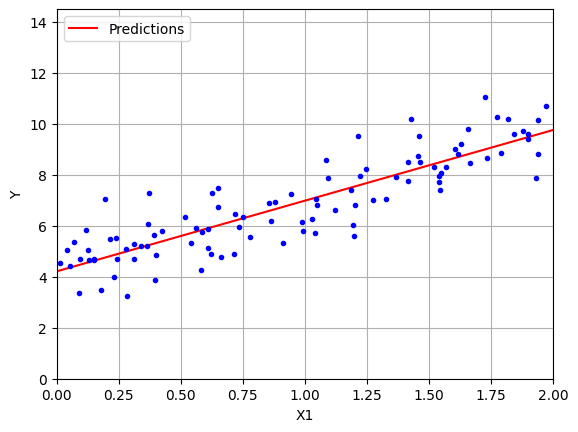

In [11]:
plt.plot(X_new,y_predict, "r-", label='Predictions')
plt.plot(X,y,"b.")
plt.ylabel('Y')
plt.ylim(0,14.5)
plt.xlabel('X1')
plt.xlim(0,2)
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()

In [14]:
lin_reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [18]:
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [19]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [20]:
np.linalg.svd(X_b)

SVDResult(U=array([[-8.51341424e-02,  6.16132489e-02, -8.96233597e-02, ...,
        -1.01302130e-01, -1.16727468e-01, -1.13563842e-01],
       [-1.45246051e-01, -1.23527170e-01, -9.95358962e-02, ...,
         2.25873105e-03,  1.36709232e-01,  1.09134404e-01],
       [-1.22427086e-01, -5.32463752e-02,  9.84685201e-01, ...,
        -8.30989388e-03,  9.42195632e-04, -9.55341209e-04],
       ...,
       [-9.06636945e-02,  4.45826201e-02, -7.24818749e-03, ...,
         9.90677854e-01, -1.20614338e-02, -1.14996256e-02],
       [-4.87105580e-02,  1.73795308e-01,  3.40620546e-03, ...,
        -1.06591304e-02,  9.70763352e-01, -2.54265328e-02],
       [-5.73148437e-02,  1.47294718e-01,  1.22106630e-03, ...,
        -1.03849245e-02, -2.57141351e-02,  9.77429775e-01]],
      shape=(100, 100)), S=array([14.37020392,  4.11961067]), Vh=array([[-0.66187141, -0.74961739],
       [ 0.74961739, -0.66187141]]))

In [21]:
# Gradient Descent
eta = 0.1 # Learning rate
n_epochs = 1000
m = len(X_b) # number of instances

In [22]:
np.random.seed(42) 
theta = np.random.randn(2,1) # Randomly initalized model parameters

In [23]:
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [24]:
theta

array([[4.21509616],
       [2.77011339]])

In [25]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)
    
np.random.seed(42)
theta = np.random.randn(2,1) # random initalization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients


In [26]:
theta

array([[4.21076011],
       [2.74856079]])

In [27]:
from sklearn.linear_model import SGDRegressor

In [28]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) #y.ravel() because fit() expects 1D targets

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [29]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [30]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

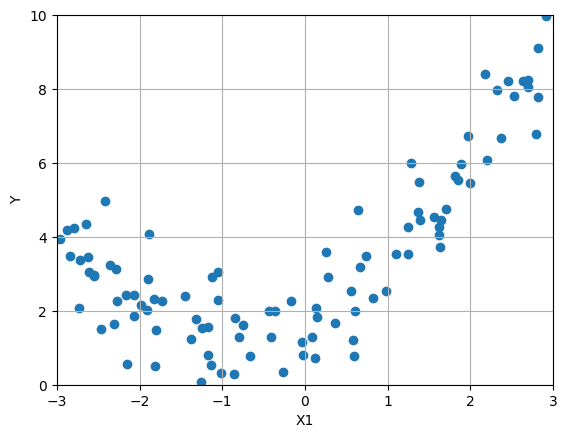

In [31]:
plt.scatter(X,y)
plt.ylim(0,10)
plt.ylabel('Y')
plt.grid() 
plt.xlim(-3,3) 
plt.xlabel('X1')
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)

In [34]:
X[0]

array([-0.75275929])

In [35]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [36]:
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [37]:
from sklearn.model_selection import learning_curve

In [38]:
train_sizes, train_scores, valid_scores = learning_curve( LinearRegression(), X, y, train_sizes=np.linspace(0.01,1.0,40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1) 
valid_errors = -valid_scores.mean(axis=1)

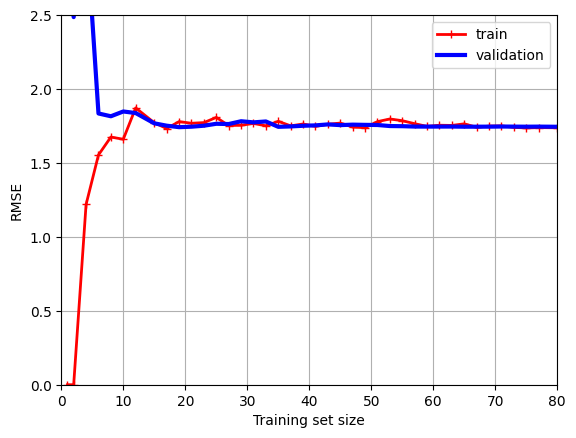

In [39]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation")
plt.ylim(0,2.5) 
plt.ylabel("RMSE")
plt.grid() 
plt.xlim(0,80) 
plt.xlabel('Training set size')
plt.legend()

In [40]:
from sklearn.pipeline import make_pipeline

In [41]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

In [42]:
train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1) 
valid_errors = -valid_scores.mean(axis=1)

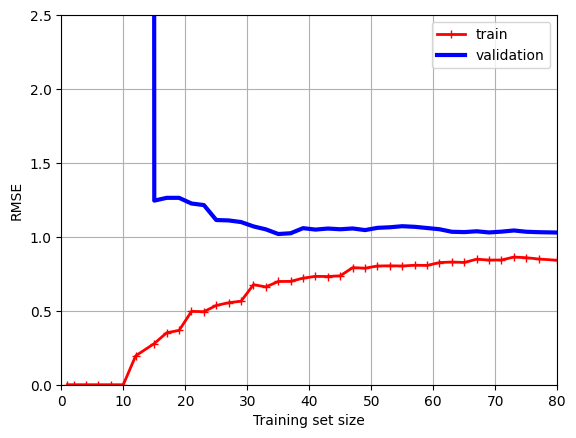

In [43]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation")
plt.ylim(0,2.5) 
plt.ylabel("RMSE")
plt.grid() 
plt.xlim(0,80) 
plt.xlabel('Training set size')
plt.legend()

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y) 
ridge_reg.predict([[1.5]])

array([4.82899748])

In [46]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)

In [47]:
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([4.82830117])

In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y) 
lasso_reg.predict([[1.5]])

array([4.77621741])

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y) 
elastic_net.predict([[1.5]])

array([4.78114505])

In [52]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=42)

In [54]:
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

In [55]:
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.fit_transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

In [56]:
print(len(X_train_prep))
print(len(y_train))

70
70


In [57]:
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep) 
    val_error = root_mean_squared_error(y_valid, y_valid_predict) 
    if val_error < best_valid_rmse: 
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [58]:
# Logit Decision Boundaries
from sklearn.datasets import load_iris

In [59]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [60]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [61]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [62]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [64]:
X = iris.data[["petal width (cm)"]].values 
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [65]:
log_reg = LogisticRegression(random_state=42) 
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [67]:
X_new = np.linspace(0,3,1000).reshape(-1,1) # Reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,-1] >= 0.5][0,0]

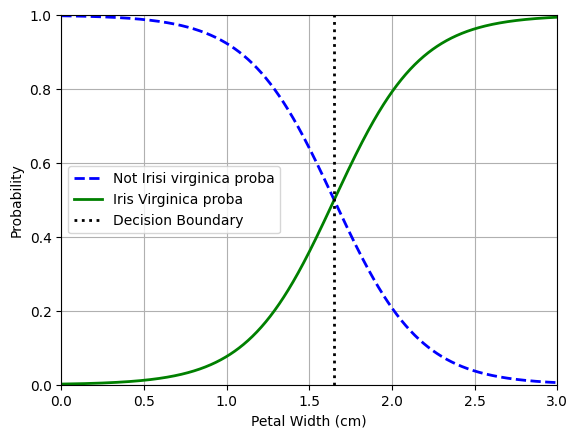

In [81]:
plt.plot(X_new, y_proba[:,0], "b--", linewidth=2, label="Not Irisi virginica proba")
plt.plot(X_new, y_proba[:,1], "g-", linewidth=2, label="Iris Virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth=2, label="Decision Boundary")
plt.grid()
plt.legend(loc='center left')
plt.ylabel("Probability")
plt.ylim(0,1)
plt.xlabel("Petal Width (cm)")
plt.xlim(0,3)

plt.show()

In [82]:
decision_boundary

np.float64(1.6516516516516517)

In [83]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

In [84]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values 
y = iris['target']
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42) 

In [85]:
softmax_reg = LogisticRegression(C=30, random_state=42) 
softmax_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,30
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [87]:
softmax_reg.predict([[5,2]])

array([2])

In [89]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])